## Import all required libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle
import json


# Step 1: Problem Statement 

# Step 2: Data Gathering 

In [2]:
df = pd.read_csv('autos_dataset.csv')
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


# Step 3: EDA [Exploratory Data Analysis]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
## After replacing ? with null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

###  3.1 symboling

In [5]:
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [6]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [7]:
### Need confirmation discussion on this columns 

### 3.2 normalized-losses

In [8]:
df['normalized-losses']

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [9]:
df['normalized-losses'].nunique()
df['normalized-losses'].value_counts()


?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [10]:
## this need to convert into int 
## Missing Values found >> Need to handle 

### 3.3 make

In [11]:
df['make'].dtype

dtype('O')

In [12]:
df['make'].nunique()

22

In [13]:
df['make'].unique() ### Nominal Categorical data found >> Solution :: One hot encoding 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### 3.4 fuel-type

In [14]:
df['fuel-type'].dtype

dtype('O')

In [15]:
df['fuel-type'].nunique()

2

In [16]:
df['fuel-type'].value_counts()  ### Categorical [Nominal data]

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [17]:
df['fuel-type'].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

### 3.5 aspiration

In [18]:
df.aspiration.dtype

dtype('O')

In [19]:
df.aspiration.nunique()

2

In [20]:
df.aspiration.value_counts()  ### Categorical [Nominal]

std      168
turbo     37
Name: aspiration, dtype: int64

In [21]:
df.aspiration.value_counts().to_dict()

{'std': 168, 'turbo': 37}

# Step 4: Feature Engineering 

##### replace questions mark (?) by null values 

In [22]:
df = df.replace({"?":np.nan})

In [23]:
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [24]:
## Handling the missing values for  normalized-losses
df['normalized-losses'].mean()
df['normalized-losses'].median()
df['normalized-losses'].mode()[0]


161.0

<AxesSubplot: xlabel='normalized-losses', ylabel='Density'>

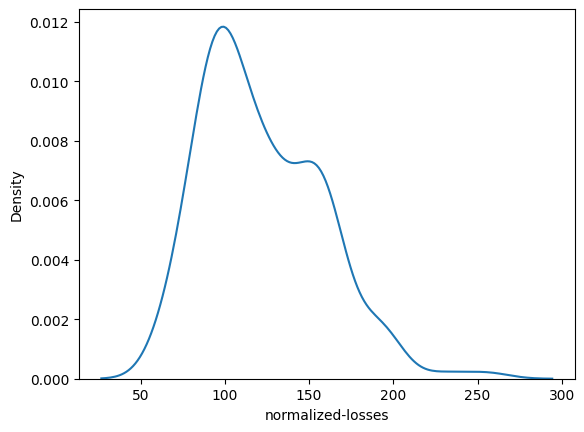

In [25]:
sns.kdeplot(df['normalized-losses'])

In [26]:
df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace=True)

In [27]:
df['normalized-losses'].isna().sum()

0

In [28]:
df['normalized-losses'].dtype

dtype('float64')

In [29]:
df['normalized-losses'] = df['normalized-losses'].astype(int)

In [30]:
df['normalized-losses'].dtype

dtype('int32')

### 4.3 make 

In [31]:
df = pd.get_dummies(df,columns=['make'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   205 non-null    int32  
 2   fuel-type           205 non-null    object 
 3   aspiration          205 non-null    object 
 4   num-of-doors        203 non-null    object 
 5   body-style          205 non-null    object 
 6   drive-wheels        205 non-null    object 
 7   engine-location     205 non-null    object 
 8   wheel-base          205 non-null    float64
 9   length              205 non-null    float64
 10  width               205 non-null    float64
 11  height              205 non-null    float64
 12  curb-weight         205 non-null    int64  
 13  engine-type         205 non-null    object 
 14  num-of-cylinders    205 non-null    object 
 15  engine-size         205 non-null    int64  
 16  fuel-sys

### 4.4 fuel-type

In [33]:
df['fuel-type'].replace({'gas': 1, 'diesel': 0}, inplace=True)

In [34]:
df['fuel-type'].dtype

dtype('int64')

In [35]:
df['fuel-type'].isna().sum()

0

### 4.5 aspiration

In [36]:
df.aspiration.replace({'std': 0, 'turbo': 1}, inplace=True)

In [37]:
df.aspiration.isna().sum()

0

In [38]:
df.aspiration.dtype

dtype('int64')

In [39]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo'],
      dtype='object')

## 3.6 num-of-doors

In [40]:
df['num-of-doors'].dtype

dtype('O')

In [41]:
df['num-of-doors'].nunique()

2

In [42]:
df['num-of-doors'].value_counts() ### Categorical [Ordinal ]

four    114
two      89
Name: num-of-doors, dtype: int64

In [43]:
df['num-of-doors'].value_counts().to_dict()

{'four': 114, 'two': 89}

In [44]:
df['num-of-doors'].replace({'four': 4, 'two': 2}, inplace=True)

In [45]:
df['num-of-doors'].isna().sum()

2

In [46]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

In [47]:
df['num-of-doors'].isna().sum()

0

In [48]:
df['num-of-doors'].dtype

dtype('float64')

In [49]:
df['num-of-doors'] = df['num-of-doors'].astype(int)

In [50]:
df['num-of-doors'].dtype

dtype('int32')

### 3.7 body-style

In [51]:
df['body-style'].dtype

dtype('O')

In [52]:
df['body-style'].value_counts() ### Categorical [Nominal Data] >> one hot 

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [53]:
df = pd.get_dummies(df, columns=['body-style'])

In [54]:
# df.info()

### 3.8 drive-wheels

In [55]:
df['drive-wheels'].value_counts() ## >> Categorical nominal data  

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [56]:
df = pd.get_dummies(df, columns=['drive-wheels'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    object 
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  engine-type             205 non-null    object 
 12  num-of-cylinders        205 non-null    object 
 13  engine-size             205 non-null    int64  
 14  fuel-system             205 non-null    ob

### 3.9 engine-location

In [58]:
df['engine-location'].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [59]:
df['engine-location'].replace({'front': 0, 'rear': 1}, inplace=True)

In [60]:
df['engine-location'].dtype

dtype('int64')

In [61]:
df['engine-location'].isna().sum()

0

### 3.10  wheel-base

In [62]:
df['wheel-base']

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

<AxesSubplot: xlabel='wheel-base', ylabel='Density'>

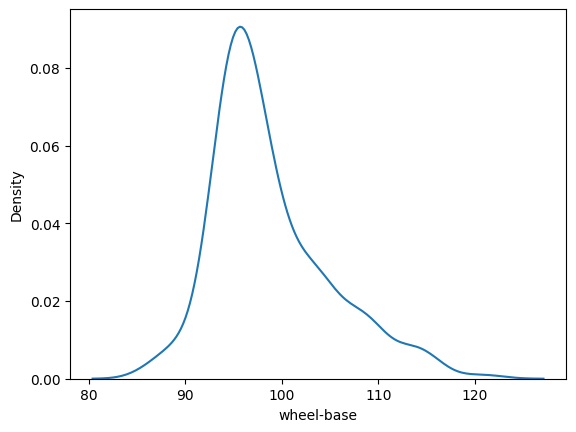

In [63]:
sns.kdeplot(df['wheel-base'])

<AxesSubplot: >

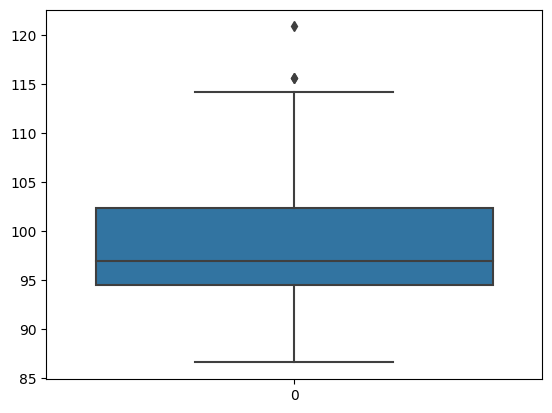

In [64]:
sns.boxplot(df['wheel-base'])

<AxesSubplot: xlabel='wheel-base'>

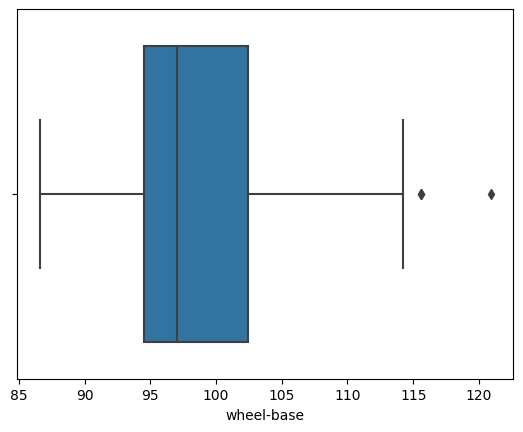

In [65]:
sns.boxplot(x = df['wheel-base'])

### 3.11 engine-type

In [66]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [67]:
df = pd.get_dummies(df,columns=['engine-type'])

In [68]:
# df.info()

### 3.12 num-of-cylinders

In [69]:
df['num-of-cylinders'].value_counts() ### Categorcial Oridnal ## label encoding 

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [70]:
df['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [71]:
df['num-of-cylinders'].replace({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  fuel-system             205 non-null    object 
 14  bore                    201 non-null    ob

### 3.13 fuel-system

In [73]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [74]:
df = pd.get_dummies(df, columns = ['fuel-system'])

### 3.14 bore 

In [75]:
# df['bore'].value_counts()

In [76]:
df['bore'] = df['bore'].astype(float)

In [77]:
df['bore'].isna().sum()

4

<AxesSubplot: xlabel='bore', ylabel='Density'>

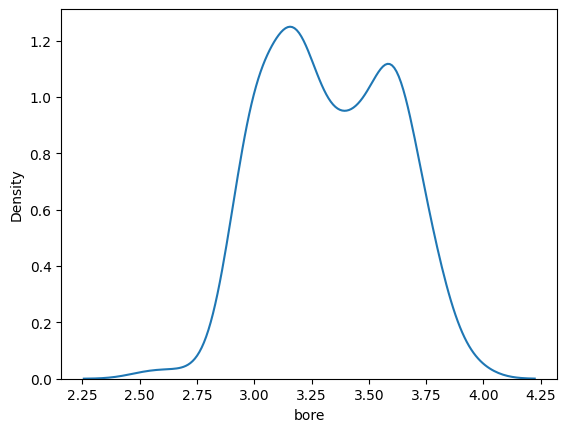

In [78]:
sns.kdeplot(df['bore'])

In [79]:
df['bore'].fillna(df['bore'].median(), inplace=True)

In [80]:
# df.info()

### 3.15 stroke

In [81]:
# df.stroke.value_counts()

In [82]:
df.stroke.isna().sum()

4

In [83]:
df.stroke.fillna(df.stroke.median(), inplace=True)

In [84]:
df.stroke.isna().sum()

0

In [85]:
df.stroke = df.stroke.astype(float)

### 3.16 horsepower

In [86]:
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [87]:
df['horsepower'].isna().sum()

2

In [88]:
df['horsepower'].median()

95.0

In [89]:
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [90]:
df['horsepower'] = df['horsepower'].astype(int)

<AxesSubplot: xlabel='horsepower', ylabel='Density'>

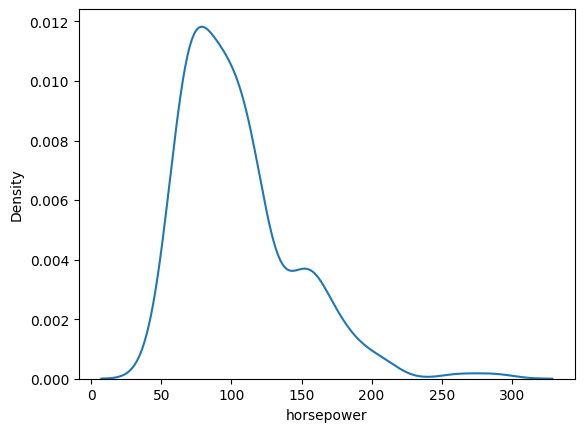

In [91]:
sns.kdeplot(df['horsepower'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  bore                    205 non-null    float64
 14  stroke                  205 non-null    fl

### 3.17 peak-rpm

In [93]:
df['peak-rpm'].isna().sum()

2

In [94]:
df['peak-rpm'].fillna(df['peak-rpm'].median(),inplace=True)

In [95]:
df['peak-rpm'] = df['peak-rpm'].astype(int)

In [96]:
df['peak-rpm'].isna().sum()

0

In [97]:
df['peak-rpm'].dtype

dtype('int32')

### 3.18 price 

In [98]:
df['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [99]:
df['price'].fillna(df['price'].median(), inplace=True)

In [100]:
df['price'] = df['price'].astype(int)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  bore                    205 non-null    float64
 14  stroke                  205 non-null    fl

In [102]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.457484,0.194311,-0.059866,-0.663595,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.457484,1.000000,0.104668,-0.011273,-0.348850,-0.021510,-0.073709,-0.006837,0.058378,-0.365674,...,0.130717,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358
fuel-type,0.194311,0.104668,1.000000,-0.401397,-0.188496,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,...,0.085556,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,-0.059866,-0.011273,-0.401397,1.000000,0.052803,-0.057191,0.257611,0.234539,0.300567,0.087311,...,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857
num-of-doors,-0.663595,-0.348850,-0.188496,0.052803,1.000000,-0.139129,0.439635,0.385675,0.197735,0.540286,...,-0.054764,-0.161052,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-0.079932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.194311,-0.104668,-1.000000,0.401397,0.188496,-0.040070,0.308346,0.212679,0.233880,0.284631,...,-0.085556,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuel-system_mfi,0.122067,0.053844,0.023020,0.149190,-0.079932,-0.008532,-0.033294,-0.004831,0.012832,-0.101245,...,-0.018218,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuel-system_mpfi,0.012532,0.179458,0.302574,-0.050041,0.035746,0.132429,0.348891,0.511374,0.461896,0.108685,...,0.282760,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuel-system_spdi,0.181939,0.052231,0.070457,0.394703,-0.148565,-0.026114,-0.117359,-0.079790,-0.046399,-0.278615,...,-0.055759,-0.030229,-0.051026,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


In [103]:
df.iloc[:,0:10].corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height
symboling,1.000000,0.457484,0.194311,-0.059866,-0.663595,0.212471,-0.531954,-0.357612,-0.232919,-0.541038
normalized-losses,0.457484,1.000000,0.104668,-0.011273,-0.348850,-0.021510,-0.073709,-0.006837,0.058378,-0.365674
fuel-type,0.194311,0.104668,1.000000,-0.401397,-0.188496,0.040070,-0.308346,-0.212679,-0.233880,-0.284631
aspiration,-0.059866,-0.011273,-0.401397,1.000000,0.052803,-0.057191,0.257611,0.234539,0.300567,0.087311
num-of-doors,-0.663595,-0.348850,-0.188496,0.052803,1.000000,-0.139129,0.439635,0.385675,0.197735,0.540286
engine-location,0.212471,-0.021510,0.040070,-0.057191,-0.139129,1.000000,-0.187790,-0.050989,-0.051698,-0.106234
wheel-base,-0.531954,-0.073709,-0.308346,0.257611,0.439635,-0.187790,1.000000,0.874587,0.795144,0.589435
length,-0.357612,-0.006837,-0.212679,0.234539,0.385675,-0.050989,0.874587,1.000000,0.841118,0.491029
width,-0.232919,0.058378,-0.233880,0.300567,0.197735,-0.051698,0.795144,0.841118,1.000000,0.279210
height,-0.541038,-0.365674,-0.284631,0.087311,0.540286,-0.106234,0.589435,0.491029,0.279210,1.000000


In [104]:
df.columns
col_list = ['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore','price']
df.loc[:,col_list].corr().tail(1)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,price
price,-0.080149,0.095489,-0.112439,0.175745,0.046497,0.331459,0.584847,0.686567,0.724558,0.140439,0.819817,0.681036,0.860343,0.532861,1.0


# Step 5. Feature Selection

In [105]:
df.shape

(205, 66)

## Step 6. Model Training

In [106]:
x = df.drop('price', axis=1)
y = df['price']

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=9)

In [107]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((164, 65), (164,), (41, 65), (41,))

In [108]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# step 7. Model Evaluation

In [109]:
## Testing data model Evalaution 

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_test,y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-Squared Value = {r2}")



MSE = 6758570.644676698
RMSE = 2599.7251094445924
MAE = 1606.8239637145414
R-Squared Value = 0.8707661351557024


In [110]:
## Training data model Evalaution 

y_pred = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_train,y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_train,y_pred)
print(f"R-Squared Value = {r2}")



MSE = 2384483.2670339695
RMSE = 1544.1772136105265
MAE = 1124.2848243006797
R-Squared Value = 0.9625461518082329


In [112]:
model

LinearRegression()

In [ ]:
### Save this model to pickle file

In [113]:
with open('linear_model.pkl','wb') as file: 
    pickle.dump(model,file)

### User Defined Function 

In [ ]:
'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
'highway-mpg'


data = [[]]

price = model.predict(data)
print(price)

In [119]:
data = x.tail(1)
data.shape

(1, 65)

In [120]:
result = model.predict(data)
result

array([21162.07541256])

In [122]:
len(x.columns)

65

In [124]:
columns = {"Column Names":x.columns.tolist()}

with open('columns_names.json','w') as file: 
    json.dump(columns,file)

In [143]:
encoded_data = {
    "fuel_type":{'gas': 1, 'diesel': 0},
    "aspiration":{'std': 0, 'turbo': 1},
    "num_of_doors":{'four': 4, 'two': 2},
    "engine_location":{'front': 0, 'rear': 1},
    "num_of_cylinders":{'four': 4,
     'six': 6,
     'five': 5,
     'eight': 8,
     'two': 2,
     'three': 3,
     'twelve': 12}
}

In [144]:
with open('encoded_data.json','w') as file: 
    json.dump(encoded_data,file)

In [131]:
index = np.where(x.columns == 'make_volvo')[0][0]
index

41

In [134]:
data['make_volvo']

204    1
Name: make_volvo, dtype: uint8

In [140]:
pd.options.display.max_columns = 70

In [145]:
df.tail(1)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
204,-1,95,1,1,4,0,109.1,188.8,68.9,55.5,3062,4,141,3.78,3.15,9.5,114,5400,19,25,22625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
